In [39]:
import tensorflow as tf
import pandas as pd
import os

In [40]:
import cv2
import imghdr
image_dir =  os.path.join("Data",'spiral','testing')
iamge_extends =['jpeg','jpg','png','bmp']
os.listdir(image_dir) # this allows to load all the i

['healthy', 'parkinson']

In [41]:
for image_folder in os.listdir(image_dir):
    for images in os.listdir(os.path.join(image_dir,image_folder)):
        print(images)
        image_path  = os.path.join(image_dir,image_folder)
        try:
            img  = cv2.imread(image_path)
        except Exception as e:
            print(e)
        

V01HE01.png
V02HE01.png
V03HE1.png
V04HE01.png
V05HE01.png
V06HE01.png
V07HE01.png
V08HE01.png
V09HE01.png
V10HE01.png
V11HE01.png
V55HE12.png
V55HE13.png
V55HE14.png
V55HE15.png
V01PE01.png
V02PE01.png
V03PE01.png
V03PE04.png
V03PE07.png
V04PE01.png
V05PE01.png
V06PE01.png
V07PE01.png
V08PE01.png
V09PE01.png
V10PE03.png
V11PE03.png
V14PE03.png
V15PE01.png


In [87]:
len(img)

256

In [42]:
tf.data.Dataset.list_files


<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None)>

In [43]:
data = tf.keras.utils.image_dataset_from_directory(os.path.join('Data','spiral','training'))

Found 72 files belonging to 2 classes.


In [45]:
data.class_names

['healthy', 'parkinson']

In [46]:
data_iterator = data.as_numpy_iterator()

In [47]:
data_iterator

In [89]:
batch = data_iterator.next()

In [95]:
batch[1]

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1])

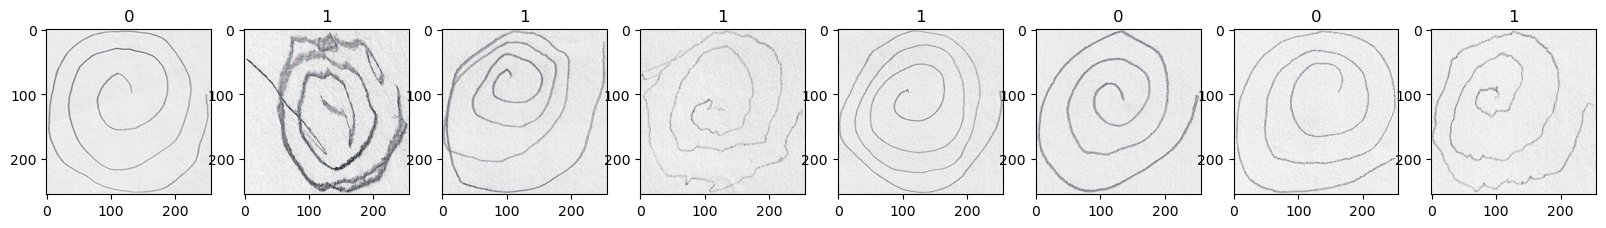

In [96]:
import matplotlib.pyplot as plt 
fig,ax =plt.subplots(ncols = 8 ,figsize =(20,20))
for idx,img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### pre processing



In [53]:
data = data.map(lambda x,y:(x/255,y))

In [54]:
train_size = int(len(data)*.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)+1

In [97]:
train_size+val_size+test_size

3

In [56]:
train = data.take(train_size)
val= data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)
len(train)

2

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Dropout
model = Sequential()
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))


In [58]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [59]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [60]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 conv2d_5 (Conv2D)           (None, 252, 252, 16)      2320      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 126, 126, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 124, 124, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 16)       

In [61]:
logdir='logs'


In [62]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [84]:
hist = model.fit(train, epochs=5, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/5
2/2 [==============================] - 4s 2s/step - loss: 0.0107 - accuracy: 1.0000
Epoch 2/5
2/2 [==============================] - 4s 2s/step - loss: 0.0065 - accuracy: 1.0000
Epoch 3/5
2/2 [==============================] - 4s 2s/step - loss: 0.0049 - accuracy: 1.0000
Epoch 4/5
2/2 [==============================] - 4s 2s/step - loss: 0.0029 - accuracy: 1.0000
Epoch 5/5
2/2 [==============================] - 5s 2s/step - loss: 0.0024 - accuracy: 1.0000


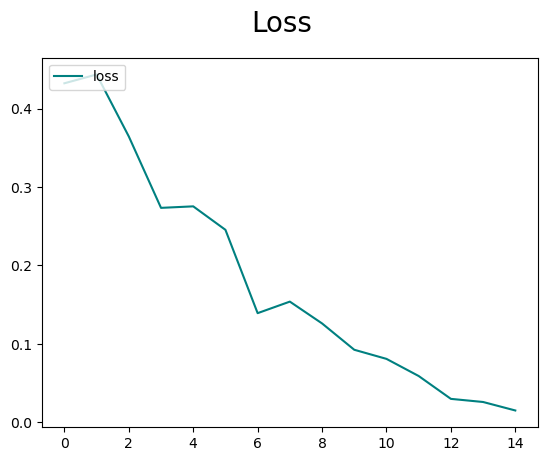

In [65]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

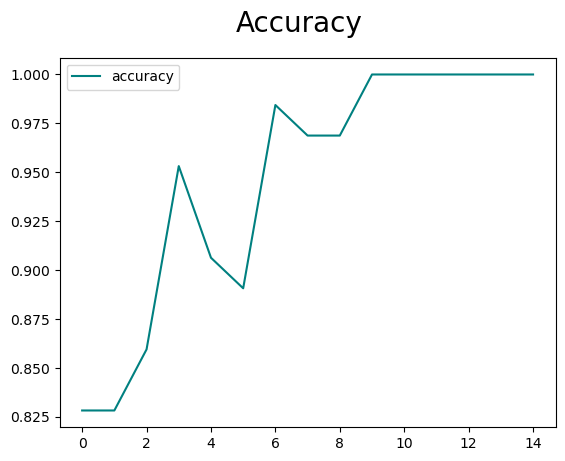

In [66]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


In [99]:
import pickle

# Saving model to disk
pickle.dump(model, open('model.pkl','wb'))

# Loading model to compare the results


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\conv2d_3
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...layers\max_pooling2d_2
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........23
.........24
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                  